In [2]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [3]:
data = scipy.io.loadmat('../data/spamData.mat')

In [4]:
def binarize_feature(feature):
    """If a feature is greater than 0, set to 1. 
    If it’s less than or equal to 0, it’s set to 0."""
    return 1 * (feature > 0)

In [5]:
x_train = pd.DataFrame(data['Xtrain'])
y_train = pd.DataFrame(data['ytrain'], columns=['y_true'])
x_test = pd.DataFrame(data['Xtest'])
y_test = pd.DataFrame(data['ytest'], columns=['y_true'])

In [6]:
# binarize features in training and test data
x_train_b = x_train.apply(binarize_feature)
x_test_b = x_test.apply(binarize_feature)

In [7]:
# Estimate class label prior (lambda) using ML; class=1(spam); class=0(not spam)
lambda_ML = y_train.sum() / y_train.count()

In [8]:
# Initialize a new column for class predictions (y_predict)
training_set = pd.concat([x_train_b, y_train], axis=1)
training_set['y_predict'] = 0
test_set = pd.concat([x_test_b, y_test], axis=1)
test_set['y_predict'] = 0

In [9]:
num_features = 57
n_train = len(training_set.index)
n_test = len(test_set.index)
alpha_values= np.arange(0, 100.5, 0.5)

In [13]:
def cal_prob_c1(alpha):

    training_set_spam = training_set[training_set['y_true']==1]
    p_j1_array = []

    for j in range(num_features):
        p_j1 = (training_set_spam.iloc[:,j].sum() + alpha) / (len(training_set_spam) + 2 *alpha)
        p_j1_array.append(p_j1)
        
    return p_j1_array

In [12]:
def cal_prob_c0(alpha):
    
    training_set_not_spam = training_set[training_set['y_true']==0]
    p_j0_array = []
    
    for j in range(num_features):
        p_j0 = (training_set_not_spam.iloc[:,j].sum() + alpha) / (len(training_set_not_spam) + 2*alpha)
        p_j0_array.append(p_j0)
        
    return p_j0_array

In [14]:
# Test Error Rate
def fit_test_set(alpha):
    test_error_rate = 0
    error_count = 0
    p_j1_array = cal_prob_c1(alpha)
    p_j0_array = cal_prob_c0(alpha)
    for n in range(n_test):
        x_n = test_set.iloc[n,0:num_features]
    
        post_predict_c1 = log(lambda_ML)
    
        for j in range(num_features):
            if x_n[j] == 1:
                post_predict_c1 += log(p_j1_array[j])
            else:
                post_predict_c1 += log(1 - p_j1_array[j])    
    
        post_predict_c0 = log(1 - lambda_ML)

        for j in range(num_features):
            if x_n[j] == 1:
                post_predict_c0 += log(p_j0_array[j])
            else:
                post_predict_c0 += log(1 - p_j0_array[j])
    
        post_predict_c1 = float(post_predict_c1)
        post_predict_c0 = float(post_predict_c0)
    
        if (post_predict_c1 > post_predict_c0):
            test_set.iloc[n,58] = 1
        else:
            test_set.iloc[n,58] = 0
    
        if test_set.iloc[n,58] != test_set.iloc[n,57]:
            error_count += 1

    test_error_rate = error_count / n_test
    return test_error_rate

In [15]:
# Train Error Rate
def fit_train_set(alpha):
    train_error_rate = 0
    error_count = 0
    p_j1_array = cal_prob_c1(alpha)
    p_j0_array = cal_prob_c0(alpha)
    for n in range(n_train):
        x_n = training_set.iloc[n,0:num_features]
    
        post_predict_c1 = log(lambda_ML)
    
        for j in range(num_features):
            if x_n[j] == 1:
                post_predict_c1 += log(p_j1_array[j])
            else:
                post_predict_c1 += log(1 - p_j1_array[j])    
    
        post_predict_c0 = log(1 - lambda_ML)

        for j in range(num_features):
            if x_n[j] == 1:
                post_predict_c0 += log(p_j0_array[j])
            else:
                post_predict_c0 += log(1 - p_j0_array[j])
    
        post_predict_c1 = float(post_predict_c1)
        post_predict_c0 = float(post_predict_c0)
    
        if (post_predict_c1 > post_predict_c0):
            training_set.iloc[n,58] = 1
        else:
            training_set.iloc[n,58] = 0

        if training_set.iloc[n,58] != training_set.iloc[n,57]:
            error_count += 1

    train_error_rate = error_count / n_train
    return train_error_rate

In [13]:
# collect error rates for different alpha values
test_rates = []
train_rates = []

for alpha in alpha_values:
    if alpha % 20 == 0:
        print('Simulation in progress: '+ str(alpha)+'%...')
    test_rates.append(fit_test_set(alpha))
    train_rates.append(fit_train_set(alpha))     

Simulation in progress: 0.0%...
Simulation in progress: 20.0%...
Simulation in progress: 40.0%...
Simulation in progress: 60.0%...
Simulation in progress: 80.0%...
Simulation in progress: 100.0%...


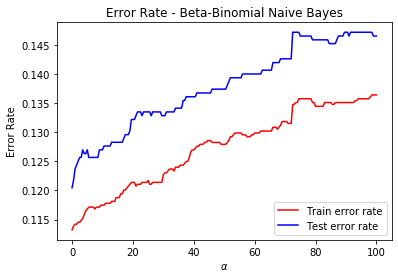

In [14]:
plt.figure(1)
plt.plot(alpha_values, train_rates, color='r', label='Train error rate')
plt.plot(alpha_values, test_rates, color='b', label='Test error rate')
plt.title('Error Rate - Beta-Binomial Naive Bayes')
plt.ylabel('Error Rate')
plt.xlabel(r'$\alpha$')
plt.legend(loc='lower right')
plt.show()

In [15]:
print(fit_test_set(1))
print(fit_test_set(10))
print(fit_test_set(100))

0.12369791666666667
0.126953125
0.146484375


In [16]:
print(fit_train_set(1))
print(fit_train_set(10))
print(fit_train_set(100))

0.11419249592169657
0.11745513866231648
0.13637846655791191
